## Lec01 - Preprocessing for ML demo : Calif Housing data, price predictions

**Task**: Predict median house values in Californian districts, given a number of features from these districts.

Starting first with the *setup chunk* wherein we import all required libraries.

In [0]:
# setup chunk
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## Importing and Exploring Dataset

Time now to import a datset (from local disk, PFB code for it) and then on some very basic, exploratory forays into what the dataset contains - variables, their types, ranges, distributions, etc.

Behold.

In [2]:
## read-in dataset from local drive
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving califHousing.csv to califHousing.csv
User uploaded file "califHousing.csv" with length 1561330 bytes


In [3]:
## read-in dataset from local drive
# path0 = "C:/Users/20052/Dropbox/teaching related/MLBM/Lec01 Intro n overview/"

housing = pd.read_csv("califHousing.csv")
housing.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The first column *Unnamed* is a holdover from csv importing. Let's drop it next and proceed.

In [4]:
housing = housing.iloc[:, 1:12]  # iloc == index location. Dropping colm 0.
print(housing.columns)  # drop the first columns from csv
print("\n\n")

# explore data file properties a bit
print("dimns of dataset are: ", housing.shape)  # show dimns
print("\n\n")

print("variable names & types are:\n", housing.info())  # show variable names & types

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')



dimns of dataset are:  (20640, 10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
variable names & types are:
 None


 Based on above table, which features above seem relevant from a (median) house price prediction standpoint? 

Note 2 feature types in there - *float64* for continuous or numeric variables & *object* for categorical features.

Let's pick one (categorical) feature & examine its contents, levels etc, shall we?

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Above was in some sense a way to discern the *distribution* of values in the *ocean proximity* feature. 

Can we also do likewise for continuous/ metric/ numeric variables? Sure we can, using the .describe() function. Behold.

In [6]:
housing.describe()  # summarize distribution of numeric wale variables.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


One thing to see a table, quite another to visualize distributions (here, as histograms since these are univariate). 

### Our First Plots in Py-Colab

Also, a nice way to intro plotting into this course. See below.

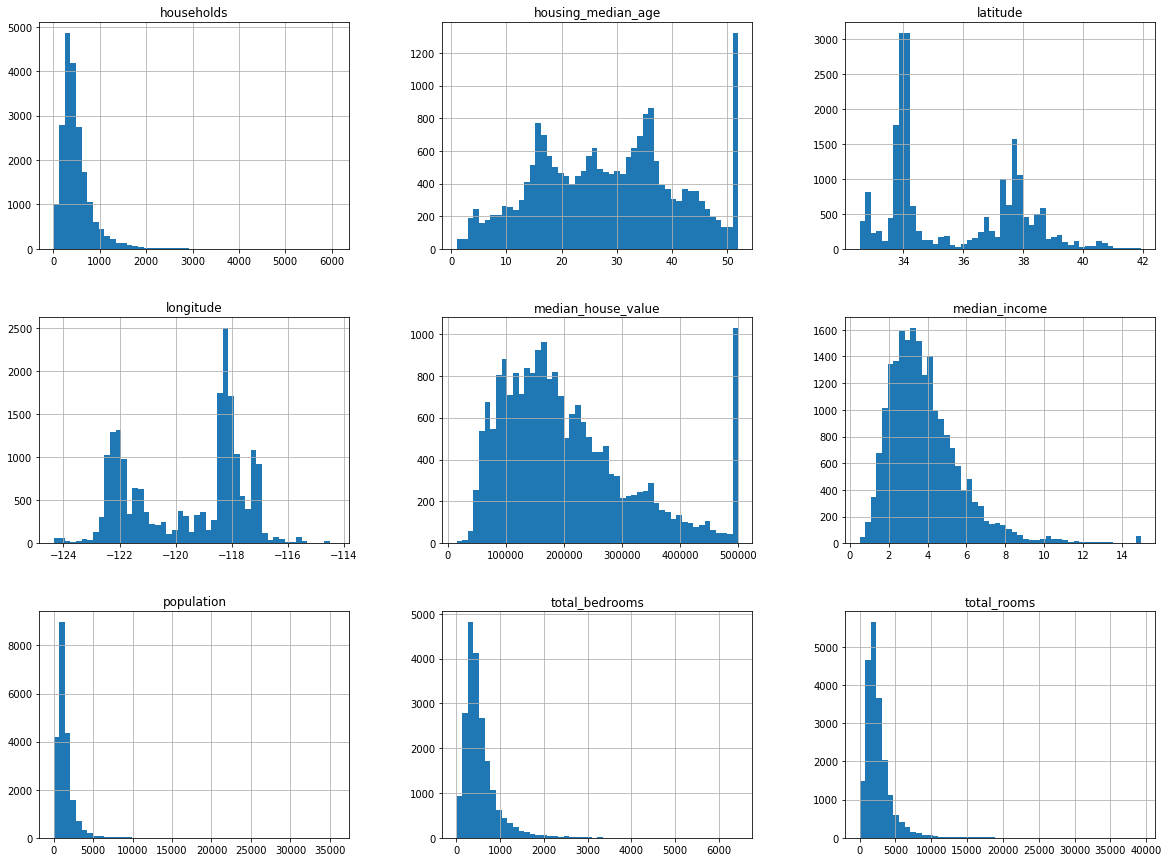

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

A few things of note in the histograms.

First, **Censoring**: See those tall bars rising at the right of histograms for housing_median_age and median_housing_value? Implication is that these values were *capped* at some upper bound.
Can be problematic since the latter is our outcome Y variable. Options? Either find actuals data prior to this pre-processing, or drop these obs from the analysis...

Second, **Units non-standard**: Median income hasn't been measured in standard USD units. Also appears to be capped at 16. Find conversion to true units.

Third, **Attribute Scaling**: All over the place. Different features having very different scaling. Might affect algo performance in some models. Recall the Cluster-An example from MKTR on why scaling affects results? We'll explore feature scaling later.

Fourth, **Tail-heavy distributions**: Longer right tails from the median than left. Can affect algo performance. May need to transform etc. 

More generally, a look at what data we have is critical for ML applications.

## Train-Test Sample Splitting

We next split the data into 2 unequal parts.  One, a *training sample* which the model trains on.

Two, the *test sample* which the model has not seen and hence, which could be used to *test* how well the model performs on data it has never seen before.

IOW, how well does the model *generalize* to unseen or fresh or new data points. 

Behold.

In [8]:
# train-test-split of the dataset into 80% training, 20% test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

test_set.head() # view a few rows

16512 train + 4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### Stratified Sampling on Critical Features (Skippable)

Suppose experts tell you that *median_income* is very important in deciding house prices. And here, pls note that we're bringing outside expert info into our modeling process.


==> So, if *median_housing* is so important, would it not be important also to ensure that the training and test set have **comparable** distributions of this critical feature? 

==> Even though the split was randomly done, there's **no real guarantee** that both samples will have comparable (ideally, identical) distributions of the most critical features.

==> Also, *median_income* is a continuous feature. So how to assure comparable distributions? 

==> Hence, below, we first create an income category attribute by *binning* median_income levels and then assuring that the distribution of income categories in both samples is comparable.

Q: But how to know what the bins should be? 

A good first step is to look at the histogram of this critical feature. Behold.

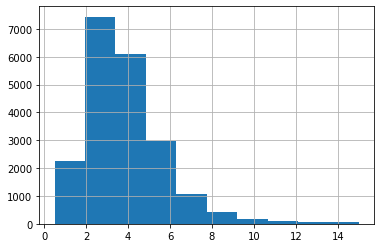

In [10]:
housing["median_income"].hist()

Seems most median_income is clustered around the USD 20k-50k mark with some extending far beyond $ 90k. 

Important that we put *bin thresholds* such that each bin has a sufficient number of observations to be split across training and test samples.

So, I propose to create bins with thresholds at 1.5, 3, 4.5 and 6+ using the *pd.cut()* func. See below.

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64




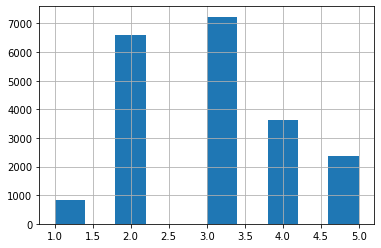

In [12]:
# Converting a continuous feature into discrete bins
housing["income_cat"] = pd.cut(housing["median_income"],    # define feature to be discretized into bins
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  # defining bin thresholds
                               labels=[1, 2, 3, 4, 5])    # names of the bins themselves

print(housing["income_cat"].value_counts())  # how many obs in each bin? Sorted list

print("\n")  # print blank newline for better readability of results below.

housing["income_cat"].hist()  # view same as a hist

Time now to ensure that this critical median_income variable has equal-ish representation across both training and test samples.

Recall *Stratified Sampling* from MKTR? Well, we're going to use the bins as strata and ensure that each subsample has a proportional representation of them. While doing the allocation *randomly*!

This is done by sklearn's *StratifiedShuffleSplit* routine. Behold

In [13]:
# do stratified subsampling into train-test
from sklearn.model_selection import StratifiedShuffleSplit

split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split1.split(housing, housing["income_cat"]):
    print(train_index[:8]); print(test_index[:8])
    
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[17606 18632 14650  3230  3555 19480  8879 13685]
[ 5241 10970 20351  6568 13285 20552 19989 17049]


One may ask, is it such a big deal, this stratified sampling thing? Wouldn't simple *random* sampling cut it? 

Well, fair point. So why not have a look at the data and decide? 

Below I present the proportions that would result from simple random vs stratified sampling compared to the true proportions of *income_category* in the original dataset. 

Behold. 

In [14]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
    }).sort_index()
    
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100    

compare_props


,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Table above shows clearly that Stratified parallels the original more closely than random but latter doesn't do too badly now either. 

So was it such a big deal? Depends, I guess. 

## Visualizing Data for Insight

Insight comes oft unexpected when we visualize data. 

Below, I create a copy of the training set to play around with in visualization (why a copy?).

Plan then is to **explore some basic visualization options** and see their effects on insight. 

**Managerial Note:** Always a good idea for you as a manager to ask for your data to be visualized. Certainly the critical wale variables.  

Behold.

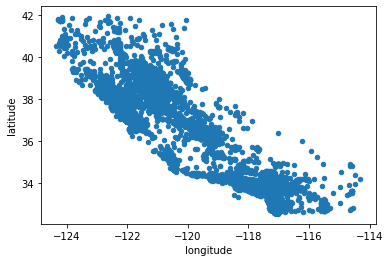

In [15]:
housing = strat_train_set.copy()  # create a copy to play with

housing.plot(kind="scatter", x="longitude", y="latitude")

Looks familiar, eh? And if it isn't then google for Califrnia's map pls. 

But, note above that plot density is unclear since multiple dots may overlap. Way around it?

The **alpha** option introduces degree of transparency as a plotting parameter.
I'm next setting alpha=0.1 and then seeing what results.

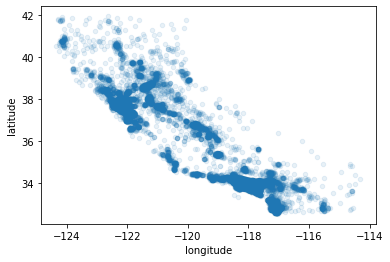

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", 
             alpha=0.1)  # alpha=0.1 ~ 10% transparency

Better? Urban pockets clearly identifiable now. Think, LA, SF, SD, Bay area, Fresno etc. 

But this is just geographical distribution of house numbers. Can't glean info on house prices or sizes for instance. 

Can we do better? Sure we can. Will use the size of each dot there (option s) to depict population and color (option c) to represent price. See below.

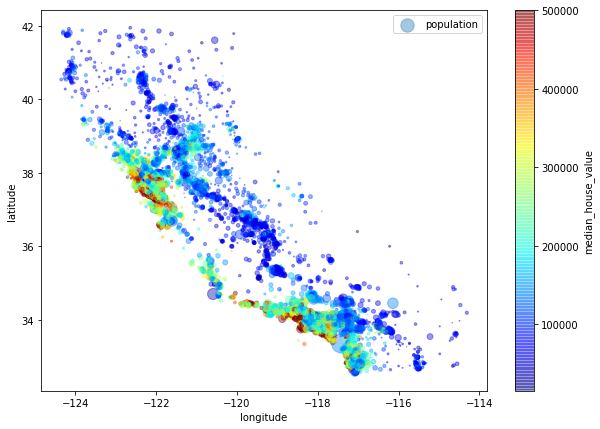

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", 
             alpha=0.4,  # for degree of transparency
             
             s=housing["population"]/100,  # size of dot
             label="population", figsize=(10,7),
             
             c="median_house_value",  # setting color to median_house_value
             cmap=plt.get_cmap("jet"), colorbar=True,
             
    sharex=False)

plt.legend()

Aha! Even more clarity. 

Seems like not all dense regions in the second plot necessarily have high home values. Those red sub-regions in the third plot do. 

Likewise, more plotting options and parameters are available for you and your analyst team to better visualize data based on context.

Now, we leave visualization behind a bit and enter another important data exploration step - gleaning inter-variable relations. The simplest type of relations being correlations, see below.

## Why simple Correlations Matter

Since the dataset isn't too large in columns, maybe instructive to see how each variable correlates with others and especially with the Y variable.

Recall (from MKTR and Stats) that the correlation coefficient (between -1 and 1) measures degree of co-movement between variables. See below. 

In [17]:
corr_matrix = housing.corr()  # finds corr across all variable pairs
corr_matrix["median_house_value"].sort_values(ascending=False)  # for Y against all variables only

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

These are univariate correlations. So which variables correlate highest with Y? Why? 

E.g., 'latitude' has a small neg correlation implying that house prices tend to drop slightly as you go north. 

Since, median_income has highest correlation with Y, let's zoom in a bit with a scatter-plot and explore the nature of the data pattern.

[0, 16, 0, 550000]

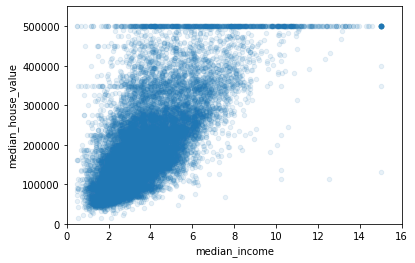

In [18]:
housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value",
             alpha=0.1)

plt.axis([0, 16, 0, 550000])

Things to note about the scatterplot above?

First, the correlation is indeed strong. Note the upward trend in the dots' mass at what is relatively low dispersion.

Second, The price cap at $ 500k is clearly visible as a horizontal line.

Third, there seem to be (district-wise?) caps at USD 400k, 350k and maybe at 280k as well. These quirks in the data risk getting 'learned' by the model we apply and reproduced dueing prediction time. 

## Attribute Combinations

So far we've tried and seen various things in data preparation prior to ML analysis. Starting with plotting histograms to stratified subsampling to correlations.

We're yet to see a few things - like feature scaling, one-hot encoding and handling missing values.

One more thing before we can prep the data for ML algos is Attribute combos, explained next.

For example, when you examine the variables we have, a few things become apparent.

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


The variable *total_rooms* in a district by itself means little. More useful might be total_rooms per household. IOW, we divide total_rooms by number of *households* per district.

Similarly, total num o bedrooms by itself means little. Better would be to obtain ratio of bedrooms to total rooms per household. 

And population per district would be better served if transformed to popn per household. And so on.

I'll do a few example transformations below. One can similarly create many more such newer (hopefully, more meaningful) variables and use in the analysis. 

Behold.

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

housing.columns   # check if new variables appear in the data

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

Now, let's re-do the correlation exercise and see what shows up, shall we? 

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Well, not bad, eh? What do the above results say to you?

Are more #rooms per household good for house prices? Are more bedrooms to rooms in a house good for prices? 

Changing tack, below, we head towards yet another important data prepn step for ML, viz. handling missing data via imputation.

### Handling Missing data

Look at the table below and tell me if data are missing and if so where?

In [22]:
housing.describe()  # hint: look at the count wala row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


Some data missing in the bedrooms wala columns. At this point we have 3 options:
    
One, drop the column entirely. We'll use .*drop()* for this.

Two, drop all rows which have this column value missing. Via *dropna()*

Three, impute some value for these missing data points. Via *fillna()*

Let's see, eh? 

In [23]:
# create a copy of the data for manipulation
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [0]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 1

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3


In [0]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [0]:
## replace missing values by column median
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3


Plan was next to get into one-hot encoding and scalers but will stop here. Whew.

Voleti.